<h1 style="font-weight:bold;">Antibody-Antigen Interactions</h1>
Antibodies, or immunoglobulins (Ig), are Y-shaped proteins produced by B cells. They specifically bind to antigens—foreign substances like bacteria, viruses, or toxins—through a region called the <span style="font-weight:bold;">paratope</span>, which recognizes a specific part of the antigen known as the <span style="font-weight:bold;">epitope</span>.

Key Functions:
<ul>
    <li>Neutralization: Antibodies can block pathogens or toxins from interacting with host cells.</li>
    <li>Opsonization: They tag pathogens for destruction by phagocytes.</li>
    <li>Agglutination: Antibodies can cross-link multiple pathogens, clumping them together for easier elimination.</li>
    <li>Complement Activation: Binding of antibodies to antigens can initiate the complement cascade, enhancing pathogen destruction.</li>
</ul>

<h1 style="font-weight:bold;">Other important definitions:</h1>

An antibody molecule consists of four polypeptide chains: two identical heavy (H) chains and two identical light (L) chains, connected by disulfide bonds .
Wikipedia

Chain Composition:<br>
<ul>
    <li>Light Chains: Each light chain has one variable (V_L) and one constant (C_L) domain.</li>
    <li>Heavy Chains: Each heavy chain comprises one variable (V_H) and three to four constant (C_H1, C_H2, C_H3, and sometimes C_H4) domains, depending on the antibody class.</li>
</ul>


Wikipedia

Functional Regions:
Fab Region (Fragment antigen-binding): Formed by the V_L and V_H domains, this region binds to specific antigens.

Fc Region (Fragment crystallizable): Composed of the constant domains of the heavy chains, it mediates interactions with cell receptors and complement proteins, facilitating immune responses.

The variable regions, particularly the <span style="font-weight:bold;">complementarity-determining regions (CDRs)</span>, determine the antibody's specificity for its antigen .






In [47]:
import os
from Bio.PDB import PDBParser, PDBList
from Bio.PDB.Polypeptide import is_aa
import nglview as nv

In [48]:
# Cell 3: Download or load PDB file
pdb_id = '1IGT'
pdbl = PDBList()
pdb_file_path = pdbl.retrieve_pdb_file(pdb_id, pdir='.', file_format='pdb')

original_name = os.path.basename(pdb_file_path)
standard_name = f"{pdb_id}.pdb"
try:
    if original_name != standard_name:
        if os.path.isfile(standard_name):
            os.remove(standard_name)
        os.rename(original_name, standard_name)
except Exception as e:
    print(f"Warning: could not rename {original_name} to {standard_name}: {e}")

pdb_path = standard_name

In [49]:
#%% Cell 4: Parse structure and auto-detect chains by residue count.
#This snippet automatically parses a PDB file to identify which chains 
# correspond to an antibody’s heavy chain, light chain, and antigen(s), based on their length:
parser = PDBParser(QUIET=True)
structure = parser.get_structure(pdb_id, pdb_path)
model = structure[0]

# Compute residue counts for each chain
table = []
for chain in model:
    count = sum(1 for res in chain if is_aa(res, standard=True))
    table.append((chain.id, count))
print("Residue counts per chain:")
for cid, cnt in table:
    print(f"  Chain {cid}: {cnt} residues")

# Sort and assign
sorted_chains = [cid for cid, _ in sorted(table, key=lambda x: x[1], reverse=True)]
HEAVY_CHAIN, LIGHT_CHAIN, *ANTIGEN_CHAINS = sorted_chains
print(f"Assigned HEAVY_CHAIN={HEAVY_CHAIN}, LIGHT_CHAIN={LIGHT_CHAIN}, ANTIGEN_CHAINS={ANTIGEN_CHAINS}")

Residue counts per chain:
  Chain A: 214 residues
  Chain B: 444 residues
  Chain C: 214 residues
  Chain D: 444 residues
  Chain E: 0 residues
  Chain F: 0 residues
Assigned HEAVY_CHAIN=B, LIGHT_CHAIN=D, ANTIGEN_CHAINS=['A', 'C', 'E', 'F']


This heuristic works because antibody heavy chains (~440–450 aa) are larger than light chains (~214 aa), while antigen chains are usually smaller or more variable in size.

In [50]:
#%% Cell 5: Visualize with py3Dmol (pure HTML viewer for VS Code)
# Install once (uncomment if you haven’t already):

import py3Dmol

# Read the PDB into a string
with open(pdb_path) as f:
    pdbstr = f.read()

# Create the viewer
view3d = py3Dmol.view(width=600, height=600)
view3d.addModel(pdbstr, 'pdb')

# Style antibody chains (HEAVY/​LIGHT) and antigen chains
view3d.setStyle(
    { 'chain': HEAVY_CHAIN }, {'cartoon': {'color': 'blue'}}
)
view3d.setStyle(
    { 'chain': LIGHT_CHAIN }, {'cartoon': {'color': 'cyan'}}
)
for c in ANTIGEN_CHAINS:
    view3d.setStyle(
        { 'chain': c }, {'cartoon': {'color': 'red'}}
    )

view3d.zoomTo()
view3d.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

The following code overlays yellow sticks on the antibody’s CDR loops and green sticks on the antigen’s epitope, all within a smaller (“compact”) py3Dmol canvas.

In [51]:
#%% Cell 6: Compact py3Dmol highlight (smaller canvas)
# Resize the existing viewer

# Define your CDR and epitope ranges
cdr_loops = {
    HEAVY_CHAIN: [(30, 35), (50, 65), (95, 102)],
    LIGHT_CHAIN: [(24, 34), (50, 56), (89, 97)]
}
epitope_ranges = [(55, 65), (120, 130)]

# Re-apply base cartoon so highlights render on top
view3d.setStyle({'cartoon': {}})

# Highlight CDR loops in yellow sticks
for chain_id, loops in cdr_loops.items():
    for start, end in loops:
        view3d.setStyle(
            {'chain': chain_id, 'resi': list(range(start, end+1))},
            {'stick': {'radius': 0.2}, 'color': 'yellow'}
        )

# Highlight epitope in green sticks
for start, end in epitope_ranges:
    view3d.setStyle(
        {'chain': ANTIGEN_CHAINS[0], 'resi': list(range(start, end+1))},
        {'stick': {'radius': 0.9}, 'color': 'green'}
    )

view3d.zoomTo()
view3d.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [52]:
for chain in model:
    if chain.id in ANTIGEN_CHAINS:
        print("Chain", chain.id, "residues:", [res.id[1] for res in chain][:20], "…")


Chain A residues: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] …
Chain C residues: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] …
Chain E residues: [1, 2, 3, 4, 5, 6, 7, 8, 9] …
Chain F residues: [1, 2, 3, 4, 5, 6, 7, 8, 9] …


This snippet analyzes the physical contacts between the antibody and antigen in your structure, first by identifying all close atom–atom pairs (van der Waals “contacts”), then by filtering those for bona fide hydrogen bonds:

In [53]:
from Bio.PDB import NeighborSearch, Selection
import numpy as np

# Define cutoff distances
vdw_cutoff = 3.5  # Å for van der Waals contacts
hbond_cutoff = 3.5  # Å for hydrogen bonds
hbond_angle_cutoff = 120  # degrees for hydrogen bond angle

# Extract atoms from antibody and antigen chains
ab_atoms = Selection.unfold_entities([model[HEAVY_CHAIN], model[LIGHT_CHAIN]], 'A')
ag_atoms = Selection.unfold_entities([model[c] for c in ANTIGEN_CHAINS], 'A')

# Build neighbor search tree
ns = NeighborSearch(ag_atoms)

# Find van der Waals contacts
vdw_contacts = []
for ab_atom in ab_atoms:
    close_atoms = ns.search(ab_atom.coord, vdw_cutoff)
    for ag_atom in close_atoms:
        if ab_atom.get_parent().get_parent().id != ag_atom.get_parent().get_parent().id:
            vdw_contacts.append((ab_atom, ag_atom))

# Find hydrogen bonds
hbond_contacts = []
for ab_atom, ag_atom in vdw_contacts:
    if ab_atom.element in ['N', 'O'] and ag_atom.element in ['N', 'O']:
        # Check geometric criteria for hydrogen bonds
        donor = ab_atom if ab_atom.element == 'N' else ag_atom
        acceptor = ag_atom if ab_atom.element == 'N' else ab_atom
        hydrogen = None

        # Find the hydrogen atom bonded to the donor
        for atom in donor.get_parent():
            if atom.element == 'H' and np.linalg.norm(atom.coord - donor.coord) < 1.2:
                hydrogen = atom
                break

        if hydrogen is not None:
            # Calculate the angle H-D-A
            vec_dh = hydrogen.coord - donor.coord
            vec_da = acceptor.coord - donor.coord
            angle = np.degrees(np.arccos(np.dot(vec_dh, vec_da) / (np.linalg.norm(vec_dh) * np.linalg.norm(vec_da))))

            if angle >= hbond_angle_cutoff:
                hbond_contacts.append((donor, acceptor, hydrogen))

# Print results
print(f"Found {len(vdw_contacts)} van der Waals contacts within {vdw_cutoff} Å")
print(f"Found {len(hbond_contacts)} hydrogen bonds within {hbond_cutoff} Å and angle ≥ {hbond_angle_cutoff}°")

# Example output of hydrogen bonds
for donor, acceptor, hydrogen in hbond_contacts[:10]:  # Show first 10
    print(f"Hydrogen bond: Donor {donor.get_full_id()} -> Acceptor {acceptor.get_full_id()} via Hydrogen {hydrogen.get_full_id()}")

Found 545 van der Waals contacts within 3.5 Å
Found 6 hydrogen bonds within 3.5 Å and angle ≥ 120°
Hydrogen bond: Donor ('1IGT', 0, 'B', (' ', 228, ' '), ('NH1', ' ')) -> Acceptor ('1IGT', 0, 'A', (' ', 119, ' '), ('O', ' ')) via Hydrogen ('1IGT', 0, 'B', (' ', 228, ' '), ('HH11', ' '))
Hydrogen bond: Donor ('1IGT', 0, 'B', (' ', 228, ' '), ('NH2', ' ')) -> Acceptor ('1IGT', 0, 'A', (' ', 119, ' '), ('O', ' ')) via Hydrogen ('1IGT', 0, 'B', (' ', 228, ' '), ('HH21', ' '))
Hydrogen bond: Donor ('1IGT', 0, 'B', (' ', 259, ' '), ('NZ', ' ')) -> Acceptor ('1IGT', 0, 'E', ('H_GAL', 6, ' '), ('O5', ' ')) via Hydrogen ('1IGT', 0, 'B', (' ', 259, ' '), ('HZ1', ' '))
Hydrogen bond: Donor ('1IGT', 0, 'E', ('H_GAL', 6, ' '), ('O6', ' ')) -> Acceptor ('1IGT', 0, 'B', (' ', 271, ' '), ('O', ' ')) via Hydrogen ('1IGT', 0, 'E', ('H_GAL', 6, ' '), ('HO6', ' '))
Hydrogen bond: Donor ('1IGT', 0, 'E', ('H_NAG', 1, ' '), ('O3', ' ')) -> Acceptor ('1IGT', 0, 'B', (' ', 278, ' '), ('OD1', ' ')) via Hydrogen

This snippet takes your list of hydrogen‐bond contacts and boils it down to the actual antibody and antigen residues involved. By the end, paratope_residues holds all unique antibody residues that participate in hydrogen bonds, and epitope_residues holds the corresponding antigen residues.

In [54]:
contacts = [(donor, acceptor) for donor, acceptor, hydrogen in hbond_contacts]
paratope_residues = set()
epitope_residues = set()
# Extract paratope and epitope residues

for ab_atom, ag_atom in contacts:
    ab_res = ab_atom.get_parent()
    ag_res = ag_atom.get_parent()
    paratope_residues.add((ab_res.get_full_id()[2], ab_res.get_id()[1]))
    epitope_residues.add((ag_res.get_full_id()[2], ag_res.get_id()[1]))

This block makes an in-silico point mutation at residue 52 of chain B in the PDB structure “1IGT” by stripping off its side-chain atoms and relabeling it as alanine. Used to simulate a mutation.

In [55]:
#Introducing mutation

from Bio.PDB import PDBParser

parser = PDBParser(QUIET=True)
structure = parser.get_structure("1IGT", "1IGT.pdb")
model = structure[0]

chain_id = "B"
residue_number = 52

chain = model[chain_id]
residue = chain[(" ", residue_number, " ")]
print("Original residue:", residue.resname)

# Keep only backbone atoms
backbone_atoms = ['N', 'CA', 'C', 'O']
for atom in list(residue):
    if atom.get_name() not in backbone_atoms:
        residue.detach_child(atom.get_id())

# Change residue name to ALA
residue.resname = "ALA"
print("Mutated residue:", residue.resname)

from Bio.PDB import PDBIO

io = PDBIO()
io.set_structure(structure)
io.save("1IGT_mutated_B52A.pdb")

Original residue: SER
Mutated residue: ALA


In [56]:
#%% Side-by-Side with Extreme Contrast

import py3Dmol
from IPython.display import display, HTML

# Read both PDBs
with open("1IGT.pdb") as f:        pdb_orig = f.read()
with open("1IGT_mutated_B52A.pdb") as f: pdb_mut  = f.read()

# Viewer dimensions
w, h = 350, 300

# Create two viewers
view_o = py3Dmol.view(width=w, height=h)
view_m = py3Dmol.view(width=w, height=h)

# Black background for max contrast
for v in (view_o, view_m):
    v.setBackgroundColor('black')
    v.addModel(pdb_orig if v is view_o else pdb_mut, 'pdb')
    # Gray cartoon for all chains
    v.setStyle({'cartoon': {}}, {'cartoon': {'color': 'lightgray', 'opacity': 0.7}})
    v.zoomTo()

# Highlight Tyr52 in original as huge red sphere
view_o.setStyle(
    {'chain': HEAVY_CHAIN, 'resi': 52},
    {'sphere': {'scale': 2.0}, 'color': 'red'}
)

# Highlight Ala52 in mutant as tiny neon-green sphere
view_m.setStyle(
    {'chain': HEAVY_CHAIN, 'resi': 52},
    {'sphere': {'scale': 0.1}, 'color': 'lime'}
)

# Render side-by-side via HTML table
html = f"""
<table style="border:none; margin:0; padding:0;">
  <tr>
    <th style="color:white; text-align:center;">Original (Tyr52)</th>
    <th style="color:white; text-align:center;">Mutant (Ala52)</th>
  </tr>
  <tr>
    <td>{view_o._make_html()}</td>
    <td>{view_m._make_html()}</td>
  </tr>
</table>
"""
display(HTML(html))


Evidently, the difference is not drastic as it is a single in-silico mutation that is fairly small.

Finally, a clear, two-column diagram where each sky-blue dot (antibody residue) is connected by a black line to the corresponding light-green dot (antigen residue), visualizing the exact residue-level contacts. Bipartite maps are useful as they can be used to identify the following:


<li>Hotspot Identification: Nodes with many edges (high degree) often correspond to binding “hotspots,” i.e. residues that disproportionately contribute to binding free energy.</li>


<li>Mapping Escape Mutations: In viral antigens, mutations in high-degree epitope nodes often lead to immune escape.</li>


<li>Guiding Engineering: For antibody optimization, you might introduce mutations in paratope residues to strengthen key H-bonds or add new ones.</li>

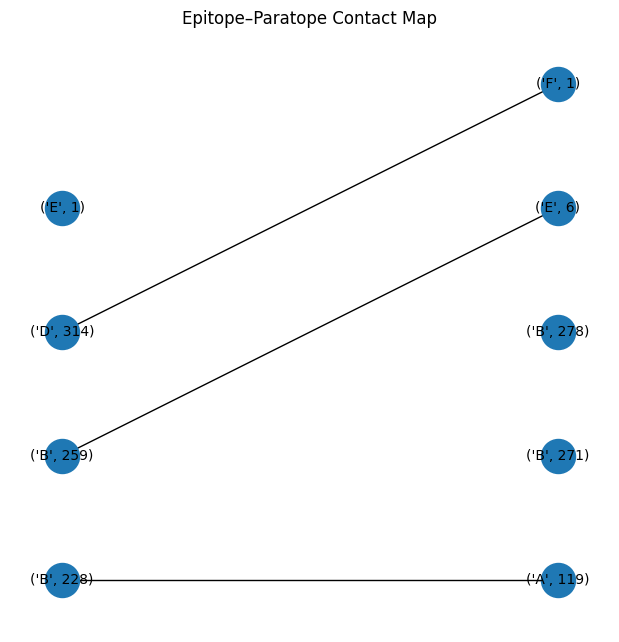

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

# Example inputs (replace these with your real data):

# contacts is a list of (ab_residue, ag_residue) tuples,
# where each residue is a (chain, resnum) pair:

# Build bipartite graph
G = nx.Graph()
G.add_nodes_from(paratope_residues, bipartite=0)
G.add_nodes_from(epitope_residues,  bipartite=1)
G.add_edges_from(contacts)

# Layout: paratope on left, epitope on right
pos = {}
# vertical spacing
y_par = list(range(len(paratope_residues)))
y_epi = list(range(len(epitope_residues)))
for i, node in enumerate(sorted(paratope_residues)):
    pos[node] = (0, y_par[i])
for i, node in enumerate(sorted(epitope_residues)):
    pos[node] = (1, y_epi[i])

plt.figure(figsize=(6,6))
nx.draw(
    G, pos,
    with_labels=True,
    node_size=600,
    font_size=10,
    # no explicit colors → defaults used
)
plt.title("Epitope–Paratope Contact Map")
plt.axis('off')
plt.show()
